<a href="https://colab.research.google.com/github/antar555/thesis_project/blob/main/DDos_attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing All Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
from sklearn import preprocessing 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

# Importing Dataset

In [ ]:
from google.colab import files
files.upload()

Saving kddcup99_csv.csv to kddcup99_csv.csv


In [ ]:
dataframe=pd.read_csv('kddcup99_csv.csv')

# Working with The Dataset


In [ ]:
dataframe.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [ ]:
dataframe.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell',
       'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells',
       'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

In [ ]:
len(dataframe.columns)

42

In [ ]:
dataframe.label.unique()

array(['normal', 'buffer_overflow', 'loadmodule', 'perl', 'neptune',
       'smurf', 'guess_passwd', 'pod', 'teardrop', 'portsweep', 'ipsweep',
       'land', 'ftp_write', 'back', 'imap', 'satan', 'phf', 'nmap',
       'multihop', 'warezmaster', 'warezclient', 'spy', 'rootkit'],
      dtype=object)

In [ ]:
dataframe.drop(dataframe[dataframe['label']=='normal'].index,inplace=True)
dataframe.drop(dataframe[dataframe['label']=='buffer_overflow'].index,inplace=True)
dataframe.drop(dataframe[dataframe['label']=='loadmodule'].index,inplace=True)
dataframe.drop(dataframe[dataframe['label']=='perl'].index,inplace=True)
dataframe.drop(dataframe[dataframe['label']=='guess_passwd'].index,inplace=True)
dataframe.drop(dataframe[dataframe['label']=='portsweep'].index,inplace=True)
dataframe.drop(dataframe[dataframe['label']=='ipsweep'].index,inplace=True)
dataframe.drop(dataframe[dataframe['label']=='ftp_write'].index,inplace=True)
dataframe.drop(dataframe[dataframe['label']=='imap'].index,inplace=True)
dataframe.drop(dataframe[dataframe['label']=='satan'].index,inplace=True)
dataframe.drop(dataframe[dataframe['label']=='phf'].index,inplace=True)
dataframe.drop(dataframe[dataframe['label']=='nmap'].index,inplace=True)
dataframe.drop(dataframe[dataframe['label']=='multihop'].index,inplace=True)
dataframe.drop(dataframe[dataframe['label']=='warezmaster'].index,inplace=True)
dataframe.drop(dataframe[dataframe['label']=='warezclient'].index,inplace=True)
dataframe.drop(dataframe[dataframe['label']=='spy'].index,inplace=True)
dataframe.drop(dataframe[dataframe['label']=='rootkit'].index,inplace=True)

In [ ]:
dataframe.label.unique()

array(['neptune', 'smurf', 'pod', 'teardrop', 'land', 'back'],
      dtype=object)

In [ ]:
dataframe.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
7601,0,tcp,telnet,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,5,0.83,1.0,0.0,0.0,0.83,0.33,0.0,5,6,1.00,0.00,0.20,0.33,1.0,0.83,0.0,0.0,neptune
7602,0,tcp,telnet,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,15,0.94,1.0,0.0,0.0,0.94,0.12,0.0,15,16,1.00,0.00,0.07,0.12,1.0,0.94,0.0,0.0,neptune
7793,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,316,316,0.00,0.0,0.0,0.0,1.00,0.00,0.0,148,3,0.02,0.02,0.02,0.00,0.0,0.00,0.0,0.0,smurf
7794,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.00,0.0,0.0,0.0,1.00,0.00,0.0,158,13,0.08,0.02,0.08,0.00,0.0,0.00,0.0,0.0,smurf
7795,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.00,0.0,0.0,0.0,1.00,0.00,0.0,168,23,0.14,0.02,0.14,0.00,0.0,0.00,0.0,0.0,smurf


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


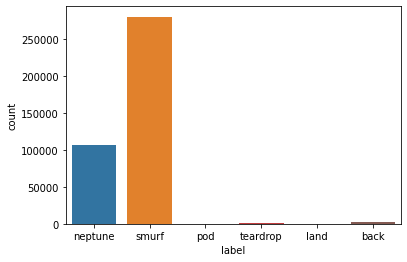

In [ ]:
sns.countplot(dataframe.label)

In [ ]:
len(dataframe[dataframe.label=='neptune'])

107201

In [ ]:
len(dataframe[dataframe.label=="smurf"])

280790

In [ ]:
len(dataframe[dataframe.label=="back"])

2203

In [ ]:
len(dataframe[dataframe.label=="teardrop"])

979

In [ ]:
len(dataframe[dataframe.label=="pod"])

264

In [ ]:
len(dataframe[dataframe.label=="land"])

21

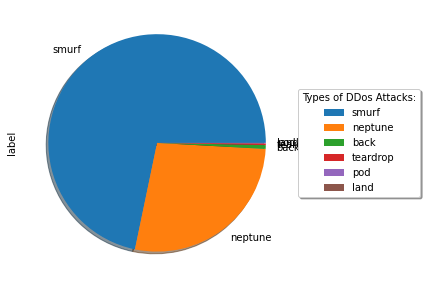

In [ ]:
dataframe['label'].value_counts().plot(kind='pie',figsize=(8,5),shadow=True)
plt.legend(title = "Types of DDos Attacks:",loc='center left',bbox_to_anchor=(1, 0, 0.5, 1),shadow=True)

In [ ]:
dataframe.protocol_type.unique()

array(['tcp', 'icmp', 'udp'], dtype=object)

In [ ]:
len(dataframe[dataframe.protocol_type=="tcp"])

109425

In [ ]:
len(dataframe[dataframe.protocol_type=="icmp"])

281054

In [ ]:
len(dataframe[dataframe.protocol_type=="udp"])

979

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


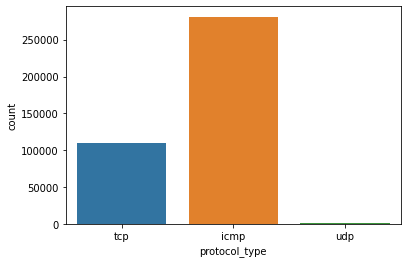

In [ ]:
sns.countplot(dataframe.protocol_type)

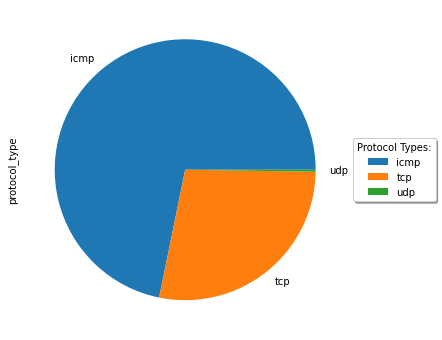

In [ ]:
dataframe['protocol_type'].value_counts().plot(kind='pie',figsize=(8,6))
plt.legend(title = "Protocol Types:",loc='center left',bbox_to_anchor=(1, 0, 0.5, 1),shadow=True)

# Applying Encoding

In [ ]:
dataframe.service.unique()

array(['telnet', 'ecr_i', 'private', 'finger', 'http', 'smtp', 'nnsp',
       'http_443', 'exec', 'login', 'shell', 'printer', 'efs', 'time',
       'courier', 'uucp', 'klogin', 'kshell', 'whois', 'name', 'echo',
       'discard', 'systat', 'daytime', 'domain', 'ftp', 'ftp_data', 'ssh',
       'mtp', 'gopher', 'remote_job', 'rje', 'ctf', 'link', 'supdup',
       'iso_tsap', 'hostnames', 'csnet_ns', 'pop_3', 'pop_2', 'sunrpc',
       'auth', 'uucp_path', 'nntp', 'netbios_ns', 'netbios_ssn',
       'netbios_dgm', 'imap4', 'sql_net', 'vmnet', 'bgp', 'Z39_50',
       'other', 'ldap', 'netstat', 'tim_i'], dtype=object)

In [ ]:
label_encoder = preprocessing.LabelEncoder() 
  

dataframe['service']= label_encoder.fit_transform(dataframe['service']) 
  
dataframe['service'].unique()

array([49, 10, 39, 13, 18, 43, 33, 19, 12, 26, 42, 38, 11, 51,  3, 52, 22,
       23, 55, 28,  9,  7, 48,  6,  8, 14, 15, 45, 27, 16, 40, 41,  5, 25,
       47, 21, 17,  4, 37, 36, 46,  1, 53, 34, 30, 31, 29, 20, 44, 54,  2,
        0, 35, 24, 32, 50])

In [ ]:
dataframe.flag.unique()

array(['S0', 'SF', 'RSTR', 'S2', 'S1', 'REJ', 'RSTO'], dtype=object)

In [ ]:
label_encoder = preprocessing.LabelEncoder() 
  
dataframe['flag']= label_encoder.fit_transform(dataframe['flag']) 
  
dataframe['flag'].unique()

array([3, 6, 2, 5, 4, 0, 1])

In [ ]:
dataframe.protocol_type.unique()

array(['tcp', 'icmp', 'udp'], dtype=object)

In [ ]:
label_encoder = preprocessing.LabelEncoder() 
dataframe['protocol_type']= label_encoder.fit_transform(dataframe['protocol_type']) 
dataframe['protocol_type'].unique()

array([1, 0, 2])

In [ ]:
dataframe.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
lnum_compromised               0
lroot_shell                    0
lsu_attempted                  0
lnum_root                      0
lnum_file_creations            0
lnum_shells                    0
lnum_access_files              0
lnum_outbound_cmds             0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
dataframe.label.unique()

array(['neptune', 'smurf', 'pod', 'teardrop', 'land', 'back'],
      dtype=object)

In [ ]:
ddos_attacks={
    'neptune':0,'smurf':1,'pod':2,'teardrop':3,'land':4,'back':5
}


In [ ]:
dataframe.label = dataframe.label.replace(ddos_attacks)
dataframe.label.unique()

array([0, 1, 2, 3, 4, 5])

# Feature Selection

In [ ]:
X=dataframe.drop(['label'],axis=1)
y=dataframe.label

In [ ]:
X.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
7601,0,1,49,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,5,0.83,1.0,0.0,0.0,0.83,0.33,0.0,5,6,1.00,0.00,0.20,0.33,1.0,0.83,0.0,0.0
7602,0,1,49,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,15,0.94,1.0,0.0,0.0,0.94,0.12,0.0,15,16,1.00,0.00,0.07,0.12,1.0,0.94,0.0,0.0
7793,0,0,10,6,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,316,316,0.00,0.0,0.0,0.0,1.00,0.00,0.0,148,3,0.02,0.02,0.02,0.00,0.0,0.00,0.0,0.0
7794,0,0,10,6,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.00,0.0,0.0,0.0,1.00,0.00,0.0,158,13,0.08,0.02,0.08,0.00,0.0,0.00,0.0,0.0
7795,0,0,10,6,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.00,0.0,0.0,0.0,1.00,0.00,0.0,168,23,0.14,0.02,0.14,0.00,0.0,0.00,0.0,0.0


In [ ]:
y.head()

7601    0
7602    0
7793    1
7794    1
7795    1
Name: label, dtype: int64

**Feature selection with f-classification**

In [ ]:
FIT_FEATURES =SelectKBest(score_func=f_classif)

In [ ]:
FIT_FEATURES.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 1  6  8 10 11 13 14 15 16 17 18 19 20 21] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectKBest(k=10, score_func=<function f_classif at 0x7f5e69ad02f0>)

In [ ]:
score_col=pd.DataFrame(FIT_FEATURES.scores_ ,columns=['value'])

In [ ]:
score_col

,value
0,1.050432e+03
1,inf
2,2.122668e+06
3,5.217655e+05
4,1.492846e+07
5,1.390096e+07
6,inf
7,1.723405e+07
8,NaN
9,6.608770e+06


In [ ]:
name_col=pd.DataFrame(X.columns)
top_features=pd.concat([name_col,score_col],axis=1)

In [ ]:
top_features

,0,value
0,duration,1.050432e+03
1,protocol_type,inf
2,service,2.122668e+06
3,flag,5.217655e+05
4,src_bytes,1.492846e+07
5,dst_bytes,1.390096e+07
6,land,inf
7,wrong_fragment,1.723405e+07
8,urgent,NaN
9,hot,6.608770e+06


In [ ]:
p=top_features.nlargest(10,'value')
p

,0,value
1,protocol_type,inf
6,land,inf
11,logged_in,inf
35,dst_host_same_src_port_rate,4.492706e+07
33,dst_host_same_srv_rate,2.557863e+07
7,wrong_fragment,1.723405e+07
23,srv_count,1.558174e+07
4,src_bytes,1.492846e+07
5,dst_bytes,1.390096e+07
32,dst_host_srv_count,1.386763e+07


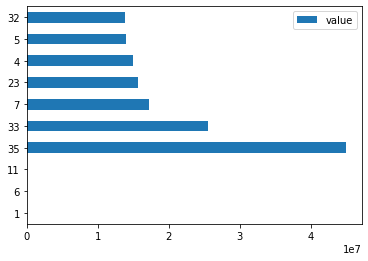

In [ ]:
p.plot(kind='barh')

**Feature selection with feature importance**

In [ ]:
model=ExtraTreesClassifier()

In [ ]:
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
model.feature_importances_

array([9.98635136e-07, 9.09493277e-02, 2.86037614e-03, 6.91322662e-02,
       5.14669380e-03, 1.89315433e-03, 6.52632326e-05, 3.20437289e-03,
       0.00000000e+00, 2.65527008e-03, 0.00000000e+00, 4.22782336e-03,
       1.90638880e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.16335738e-02, 7.36520511e-02,
       3.67347194e-02, 5.07884195e-02, 9.47358256e-03, 6.81918243e-03,
       1.24630196e-01, 1.86975037e-02, 2.81003997e-04, 5.96625631e-04,
       1.16649306e-01, 1.02940012e-01, 9.80701904e-03, 1.24581879e-01,
       9.76705513e-05, 4.56256212e-02, 6.07566813e-02, 3.43028730e-03,
       1.07627312e-02])

In [ ]:
top= pd.Series(model.feature_importances_ ,index=X.columns)

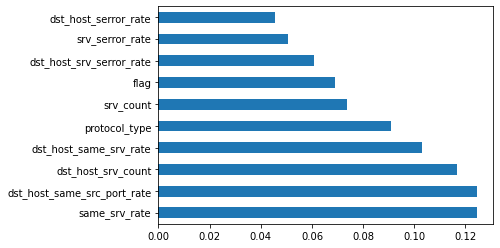

In [ ]:
top.nlargest(10).plot(kind='barh')

# New Dataframe creation with selected features

In [ ]:
df=dataframe[['protocol_type','land','logged_in','dst_host_same_src_port_rate','dst_host_same_srv_rate','wrong_fragment','srv_count','src_bytes','dst_bytes','dst_host_srv_count','label']]

In [ ]:
df

,protocol_type,land,logged_in,dst_host_same_src_port_rate,dst_host_same_srv_rate,wrong_fragment,srv_count,src_bytes,dst_bytes,dst_host_srv_count,label
7601,1,0,0,0.20,1.00,0,5,0,0,6,0
7602,1,0,0,0.07,1.00,0,15,0,0,16,0
7793,0,0,0,0.02,0.02,0,316,1032,0,3,1
7794,0,0,0,0.08,0.08,0,511,1032,0,13,1
7795,0,0,0,0.14,0.14,0,511,1032,0,23,1
...,...,...,...,...,...,...,...,...,...,...,...
490959,2,0,0,0.38,0.38,3,29,28,0,96,3
490960,2,0,0,0.38,0.38,3,30,28,0,97,3
490961,2,0,0,0.38,0.38,3,31,28,0,98,3
490962,2,0,0,0.39,0.39,3,32,28,0,99,3


In [ ]:
df.head()

,protocol_type,land,logged_in,dst_host_same_src_port_rate,dst_host_same_srv_rate,wrong_fragment,srv_count,src_bytes,dst_bytes,dst_host_srv_count,label
7601,1,0,0,0.20,1.00,0,5,0,0,6,0
7602,1,0,0,0.07,1.00,0,15,0,0,16,0
7793,0,0,0,0.02,0.02,0,316,1032,0,3,1
7794,0,0,0,0.08,0.08,0,511,1032,0,13,1
7795,0,0,0,0.14,0.14,0,511,1032,0,23,1


# Working with new dataframe

In [ ]:
X=df.drop('label',axis='columns')
y=df.label

In [ ]:
X.head()

,protocol_type,land,logged_in,dst_host_same_src_port_rate,dst_host_same_srv_rate,wrong_fragment,srv_count,src_bytes,dst_bytes,dst_host_srv_count
7601,1,0,0,0.20,1.00,0,5,0,0,6
7602,1,0,0,0.07,1.00,0,15,0,0,16
7793,0,0,0,0.02,0.02,0,316,1032,0,3
7794,0,0,0,0.08,0.08,0,511,1032,0,13
7795,0,0,0,0.14,0.14,0,511,1032,0,23


In [ ]:
y

7601      0
7602      0
7793      1
7794      1
7795      1
         ..
490959    3
490960    3
490961    3
490962    3
490963    3
Name: label, Length: 391458, dtype: int64

In [ ]:
X.corr()

,protocol_type,land,logged_in,dst_host_same_src_port_rate,dst_host_same_srv_rate,wrong_fragment,srv_count,src_bytes,dst_bytes,dst_host_srv_count
protocol_type,1.000000,0.011475,0.117855,-0.989534,-0.975804,0.182286,-0.988887,0.014610,0.117525,-0.978872
land,0.011475,1.000000,-0.000551,0.002474,0.002301,-0.000393,-0.011943,-0.001774,-0.000549,-0.012280
logged_in,0.117855,-0.000551,1.000000,-0.118566,0.046507,-0.004034,-0.122054,0.991979,0.997196,0.013614
dst_host_same_src_port_rate,-0.989534,0.002474,-0.118566,1.000000,0.985727,-0.052177,0.995848,-0.014965,-0.118357,0.988082
dst_host_same_srv_rate,-0.975804,0.002301,0.046507,0.985727,1.000000,-0.057001,0.981441,0.149407,0.046376,0.996967
wrong_fragment,0.182286,-0.000393,-0.004034,-0.052177,-0.057001,1.000000,-0.076798,-0.011046,-0.004018,-0.063292
srv_count,-0.988887,-0.011943,-0.122054,0.995848,0.981441,-0.076798,1.000000,-0.017737,-0.121712,0.985980
src_bytes,0.014610,-0.001774,0.991979,-0.014965,0.149407,-0.011046,-0.017737,1.000000,0.991192,0.116834
dst_bytes,0.117525,-0.000549,0.997196,-0.118357,0.046376,-0.004018,-0.121712,0.991192,1.000000,0.013802
dst_host_srv_count,-0.978872,-0.012280,0.013614,0.988082,0.996967,-0.063292,0.985980,0.116834,0.013802,1.000000


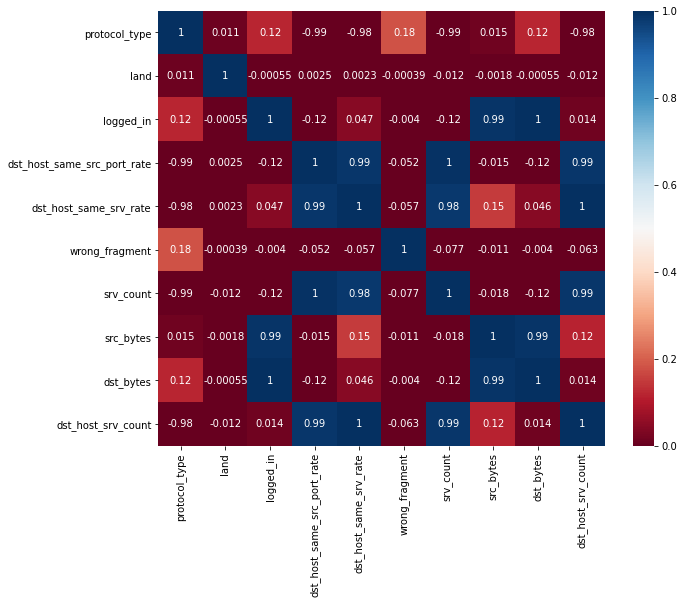

In [ ]:
plt.figure(figsize=(10,8))
heat_map = sns.heatmap(X.corr(), annot=True,cmap="RdBu",vmin=0, vmax=1 )
heat_map

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.7)

In [ ]:
len(X_train)

117437

In [ ]:
len(X_test)

274021

# Applying Machine Learning

**Decision Tree**

In [ ]:
DT= tree.DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_predict = DT.predict(X_test)
for i in y_predict:
    if i==0:
        print("neptune")
    elif i==1:
        print("smurf")
    elif i==2:
        print("pod")
    elif i==3:
        print("teardrop")
    elif i==4:
        print("land")
    elif i==5:
        print("back")

Streaming output truncated to the last 5000 lines.
neptune
smurf
smurf
smurf
smurf
neptune
neptune
smurf
smurf
neptune
smurf
neptune
neptune
smurf
smurf
neptune
smurf
smurf
neptune
smurf
smurf
smurf
neptune
smurf
smurf
smurf
neptune
smurf
smurf
neptune
smurf
neptune
neptune
neptune
smurf
neptune
smurf
smurf
neptune
smurf
smurf
smurf
neptune
neptune
smurf
smurf
neptune
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
smurf
neptune
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
neptune
smurf
neptune
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
neptune
smurf
smurf
smurf
neptune
smurf
neptune
neptune
neptune
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
neptune
smurf
smurf
smurf
smurf
neptune
smurf
smurf
neptune
neptune
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
neptune
smurf
smurf
smurf
smurf
smurf
neptune
smurf
neptune
neptune
smurf
neptune
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
s

In [ ]:
s=DT.score(X_test,y_test)
p=100
m=s*p
print(m)

99.99890519339759


In [ ]:
DT_error=np.mean(y_predict != y_test)
DT_error

1.0948066024136835e-05

Confusion Matrix:
 [[ 75149      0      0      0      0      0]
 [     0 196467      3      0      0      0]
 [     0      0    182      0      0      0]
 [     0      0      0    691      0      0]
 [     0      0      0      0     14      0]
 [     0      0      0      0      0   1515]]


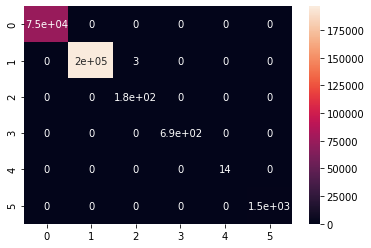

In [ ]:
cm = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:\n",cm)
sns.heatmap(cm, annot=True)

In [ ]:
report = classification_report(y_test,y_predict)
print("Report:\n",report)

Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     75149
           1       1.00      1.00      1.00    196470
           2       0.98      1.00      0.99       182
           3       1.00      1.00      1.00       691
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00      1515

    accuracy                           1.00    274021
   macro avg       1.00      1.00      1.00    274021
weighted avg       1.00      1.00      1.00    274021



**Support Vector Machine**

In [ ]:
svc= SVC()
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_predict = svc.predict(X_test)
for i in y_predict:
    if i==0:
        print("neptune")
    elif i==1:
        print("smurf")
    elif i==2:
        print("pod")
    elif i==3:
        print("teardrop")
    elif i==4:
        print("land")
    elif i==5:
        print("back")

Streaming output truncated to the last 5000 lines.
neptune
smurf
smurf
smurf
smurf
neptune
neptune
smurf
smurf
neptune
smurf
neptune
neptune
smurf
smurf
neptune
smurf
smurf
neptune
smurf
smurf
smurf
neptune
smurf
smurf
smurf
neptune
smurf
smurf
neptune
smurf
neptune
neptune
neptune
smurf
neptune
smurf
smurf
neptune
smurf
smurf
smurf
neptune
neptune
smurf
smurf
neptune
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
smurf
neptune
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
neptune
smurf
neptune
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
neptune
smurf
smurf
smurf
neptune
smurf
neptune
neptune
neptune
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
neptune
smurf
smurf
smurf
smurf
neptune
smurf
smurf
neptune
neptune
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
neptune
smurf
smurf
smurf
smurf
smurf
neptune
smurf
neptune
neptune
smurf
neptune
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
s

In [ ]:
s=svc.score(X_test,y_test)
p=100
m1=s*p
print("Accuracy: %0.3f" %m1)

Accuracy: 99.741


In [ ]:
svm_error=np.mean(y_predict != y_test)
svm_error

0.0025873929370376723

Confusion Matrix:
 [[ 75149      0      0      0      0      0]
 [     0 196470      0      0      0      0]
 [     0      4    178      0      0      0]
 [   691      0      0      0      0      0]
 [    14      0      0      0      0      0]
 [     0      0      0      0      0   1515]]


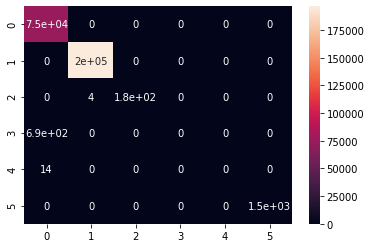

In [ ]:
cm = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:\n",cm)
sns.heatmap(cm, annot=True)

In [ ]:
report = classification_report(y_test,y_predict)
print("Report:\n",report)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     75149
           1       1.00      1.00      1.00    196470
           2       1.00      0.98      0.99       182
           3       0.00      0.00      0.00       691
           4       0.00      0.00      0.00        14
           5       1.00      1.00      1.00      1515

    accuracy                           1.00    274021
   macro avg       0.67      0.66      0.66    274021
weighted avg       0.99      1.00      1.00    274021



**Random Forest**

In [ ]:
RF = RandomForestClassifier(max_depth=7)
RF.fit(X_train, y_train)
y_predict = RF.predict(X_test)
for i in y_predict:
    if i==0:
        print("neptune")
    elif i==1:
        print("smurf")
    elif i==2:
        print("pod")
    elif i==3:
        print("teardrop")
    elif i==4:
        print("land")
    elif i==5:
        print("back")

Streaming output truncated to the last 5000 lines.
neptune
smurf
smurf
smurf
smurf
neptune
neptune
smurf
smurf
neptune
smurf
neptune
neptune
smurf
smurf
neptune
smurf
smurf
neptune
smurf
smurf
smurf
neptune
smurf
smurf
smurf
neptune
smurf
smurf
neptune
smurf
neptune
neptune
neptune
smurf
neptune
smurf
smurf
neptune
smurf
smurf
smurf
neptune
neptune
smurf
smurf
neptune
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
smurf
neptune
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
neptune
smurf
neptune
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
neptune
smurf
smurf
smurf
neptune
smurf
neptune
neptune
neptune
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
neptune
smurf
smurf
smurf
smurf
neptune
smurf
smurf
neptune
neptune
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
neptune
smurf
smurf
smurf
smurf
smurf
neptune
smurf
neptune
neptune
smurf
neptune
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
s

In [ ]:
s=RF.score(X_test,y_test)
p=100
m2=s*p
print(m2)

99.99963506446586


In [ ]:
RF_error=np.mean(y_predict != y_test)
RF_error

3.6493553413789454e-06

Confusion Matrix:
 [[ 75148      0      0      0      1      0]
 [     0 196470      0      0      0      0]
 [     0      0    182      0      0      0]
 [     0      0      0    691      0      0]
 [     0      0      0      0     14      0]
 [     0      0      0      0      0   1515]]


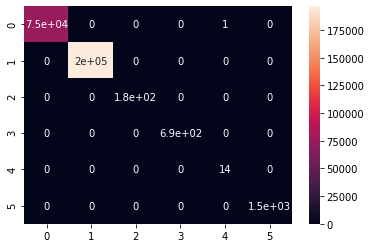

In [ ]:
cm = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:\n",cm)
sns.heatmap(cm, annot=True)

In [ ]:
report = classification_report(y_test,y_predict)
print("Report:\n",report)

Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     75149
           1       1.00      1.00      1.00    196470
           2       1.00      1.00      1.00       182
           3       1.00      1.00      1.00       691
           4       0.93      1.00      0.97        14
           5       1.00      1.00      1.00      1515

    accuracy                           1.00    274021
   macro avg       0.99      1.00      0.99    274021
weighted avg       1.00      1.00      1.00    274021



In [ ]:
KNN=KNeighborsClassifier(n_neighbors=6)
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [ ]:
y_predict = KNN.predict(X_test)
for i in y_predict:
    if i==0:
        print("neptune")
    elif i==1:
        print("smurf")
    elif i==2:
        print("pod")
    elif i==3:
        print("teardrop")
    elif i==4:
        print("land")
    elif i==5:
        print("back")

Streaming output truncated to the last 5000 lines.
neptune
smurf
smurf
smurf
smurf
neptune
neptune
smurf
smurf
neptune
smurf
neptune
neptune
smurf
smurf
neptune
smurf
smurf
neptune
smurf
smurf
smurf
neptune
smurf
smurf
smurf
neptune
smurf
smurf
neptune
smurf
neptune
neptune
neptune
smurf
neptune
smurf
smurf
neptune
smurf
smurf
smurf
neptune
neptune
smurf
smurf
neptune
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
smurf
neptune
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
neptune
smurf
neptune
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
neptune
smurf
smurf
smurf
neptune
smurf
neptune
neptune
neptune
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
neptune
smurf
smurf
smurf
smurf
neptune
smurf
smurf
neptune
neptune
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
neptune
smurf
smurf
smurf
smurf
smurf
neptune
smurf
neptune
neptune
smurf
neptune
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
s

In [ ]:
s2=KNN.score(X_test,y_test)
p=100
m3=s2*p
print("Accuracy: %0.3f" %m3)

Accuracy: 99.992


In [ ]:
KNN_error=np.mean(y_predict != y_test)
KNN_error

8.393517285171574e-05

Confusion Matrix:
 [[ 75149      0      0      0      0      0]
 [     0 196470      0      0      0      0]
 [     0      4    178      0      0      0]
 [     0      0      0    691      0      0]
 [    14      0      0      0      0      0]
 [     0      0      5      0      0   1510]]


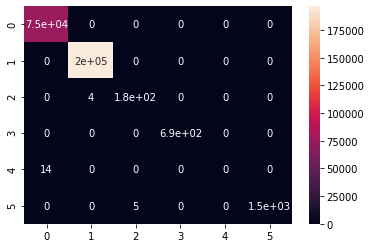

In [ ]:
cm = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:\n",cm)
sns.heatmap(cm, annot=True)

In [ ]:
report = classification_report(y_test,y_predict)
print("Report:\n",report)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     75149
           1       1.00      1.00      1.00    196470
           2       0.97      0.98      0.98       182
           3       1.00      1.00      1.00       691
           4       0.00      0.00      0.00        14
           5       1.00      1.00      1.00      1515

    accuracy                           1.00    274021
   macro avg       0.83      0.83      0.83    274021
weighted avg       1.00      1.00      1.00    274021



**Logistic Regression**

In [ ]:
LR= LogisticRegression()
LR.fit(X_train, y_train)
y_predict = LR.predict(X_test)
for i in y_predict:
    if i==0:
        print("neptune")
    elif i==1:
        print("smurf")
    elif i==2:
        print("pod")
    elif i==3:
        print("teardrop")
    elif i==4:
        print("land")
    elif i==5:
        print("back")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Streaming output truncated to the last 5000 lines.
neptune
smurf
smurf
smurf
smurf
neptune
neptune
smurf
smurf
neptune
smurf
neptune
neptune
smurf
smurf
neptune
smurf
smurf
neptune
smurf
smurf
smurf
neptune
smurf
smurf
smurf
neptune
smurf
smurf
neptune
smurf
neptune
neptune
neptune
smurf
neptune
smurf
smurf
neptune
smurf
smurf
smurf
neptune
neptune
smurf
smurf
neptune
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
smurf
neptune
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
neptune
smurf
neptune
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
neptune
smurf
smurf
smurf
neptune
smurf
neptune
neptune
neptune
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
neptune
smurf
smurf
smurf
smurf
neptune
smurf
smurf
neptune
neptune
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
neptune
smurf
smurf
smurf
smurf
smurf
neptune
smurf
neptune
neptune
smurf
neptune
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
s

In [ ]:
s2=LR.score(X_test,y_test)
p=100
m4=s2*p
print("Accuracy: %0.3f" %m4)

Accuracy: 99.989


In [ ]:
LR_error=np.mean(y_predict != y_test)
LR_error

0.0001131300155827473

Confusion Matrix:
 [[ 75149      0      0      0      0      0]
 [     0 196469      1      0      0      0]
 [     0      0    182      0      0      0]
 [     7      0      5    679      0      0]
 [    14      0      0      0      0      0]
 [     0      0      4      0      0   1511]]


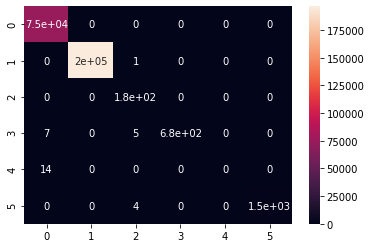

In [ ]:
cm = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:\n",cm)
sns.heatmap(cm, annot=True)

In [ ]:
report = classification_report(y_test,y_predict)
print("Report:\n",report)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     75149
           1       1.00      1.00      1.00    196470
           2       0.95      1.00      0.97       182
           3       1.00      0.98      0.99       691
           4       0.00      0.00      0.00        14
           5       1.00      1.00      1.00      1515

    accuracy                           1.00    274021
   macro avg       0.82      0.83      0.83    274021
weighted avg       1.00      1.00      1.00    274021



In [ ]:
MLP=MLPClassifier()
MLP.fit(X_train, y_train)
y_predict = MLP.predict(X_test)
for i in y_predict:
    if i==0:
        print("neptune")
    elif i==1:
        print("smurf")
    elif i==2:
        print("pod")
    elif i==3:
        print("teardrop")
    elif i==4:
        print("land")
    elif i==5:
        print("back")


Streaming output truncated to the last 5000 lines.
neptune
smurf
smurf
smurf
smurf
neptune
neptune
smurf
smurf
neptune
smurf
neptune
neptune
smurf
smurf
neptune
smurf
smurf
neptune
smurf
smurf
smurf
neptune
smurf
smurf
smurf
neptune
smurf
smurf
neptune
smurf
neptune
neptune
neptune
smurf
neptune
smurf
smurf
neptune
smurf
smurf
smurf
neptune
neptune
smurf
smurf
neptune
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
smurf
neptune
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
neptune
smurf
neptune
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
neptune
smurf
smurf
smurf
neptune
smurf
neptune
neptune
neptune
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
neptune
smurf
smurf
smurf
smurf
neptune
smurf
smurf
neptune
neptune
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
neptune
smurf
smurf
smurf
smurf
smurf
neptune
smurf
neptune
neptune
smurf
neptune
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
s

In [ ]:
s2=MLP.score(X_test,y_test)
p=100
m5=s2*p
print("Accuracy: %0.3f" %m5)

Accuracy: 99.998


In [ ]:
MLP_error=np.mean(y_predict != y_test)
MLP_error

1.8246776706894728e-05

Confusion Matrix:
 [[ 75148      0      0      0      1      0]
 [     0 196468      2      0      0      0]
 [     0      0    182      0      0      0]
 [     0      0      0    691      0      0]
 [     0      0      0      0     14      0]
 [     0      0      2      0      0   1513]]


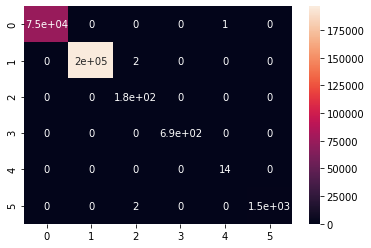

In [ ]:
cm = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:\n",cm)
sns.heatmap(cm, annot=True)

In [ ]:
report = classification_report(y_test,y_predict)
print("Report:\n",report)

Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     75149
           1       1.00      1.00      1.00    196470
           2       0.98      1.00      0.99       182
           3       1.00      1.00      1.00       691
           4       0.93      1.00      0.97        14
           5       1.00      1.00      1.00      1515

    accuracy                           1.00    274021
   macro avg       0.99      1.00      0.99    274021
weighted avg       1.00      1.00      1.00    274021



**Naive Bias**

In [ ]:
NB=GaussianNB()
NB.fit(X_train,y_train)
y_predict = NB.predict(X_test)
for i in y_predict:
    if i==0:
        print("neptune")
    elif i==1:
        print("smurf")
    elif i==2:
        print("pod")
    elif i==3:
        print("teardrop")
    elif i==4:
        print("land")
    elif i==5:
        print("back")

Streaming output truncated to the last 5000 lines.
neptune
smurf
smurf
smurf
smurf
neptune
neptune
smurf
smurf
neptune
smurf
neptune
neptune
smurf
smurf
neptune
smurf
smurf
neptune
smurf
smurf
smurf
neptune
smurf
smurf
smurf
neptune
smurf
smurf
neptune
smurf
neptune
neptune
neptune
smurf
neptune
smurf
smurf
neptune
smurf
smurf
smurf
neptune
neptune
smurf
smurf
neptune
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
smurf
neptune
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
neptune
smurf
neptune
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
neptune
smurf
smurf
smurf
neptune
smurf
neptune
neptune
neptune
neptune
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
neptune
smurf
smurf
smurf
smurf
neptune
smurf
smurf
neptune
neptune
smurf
smurf
smurf
smurf
neptune
smurf
smurf
smurf
neptune
smurf
smurf
smurf
smurf
smurf
neptune
smurf
neptune
neptune
smurf
neptune
smurf
smurf
smurf
smurf
smurf
smurf
neptune
smurf
s

In [ ]:
s2=NB.score(X_test,y_test)
p=100
m6=s2*p
print("Accuracy: %0.3f" %m6)

Accuracy: 99.969


In [ ]:
NB_error=np.mean(y_predict != y_test)
NB_error

0.0003138445593585893

Confusion Matrix:
 [[ 75143      0      5      0      1      0]
 [     0 196392     78      0      0      0]
 [     0      0    182      0      0      0]
 [     0      0      0    689      0      2]
 [     0      0      0      0     14      0]
 [     0      0      0      0      0   1515]]


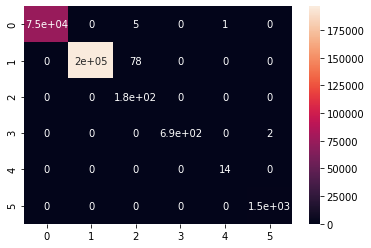

In [ ]:
cm = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:\n",cm)
sns.heatmap(cm, annot=True)

In [ ]:
report = classification_report(y_test,y_predict)
print("Report:\n",report)

Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     75149
           1       1.00      1.00      1.00    196470
           2       0.69      1.00      0.81       182
           3       1.00      1.00      1.00       691
           4       0.93      1.00      0.97        14
           5       1.00      1.00      1.00      1515

    accuracy                           1.00    274021
   macro avg       0.94      1.00      0.96    274021
weighted avg       1.00      1.00      1.00    274021



In [ ]:
classifiers = ["DT", "SVM","RF","KNN","LR","MLP","NB"]
scores = [m,m1,m2,m3,m4,m5,m6]

In [ ]:
Accuracy=pd.DataFrame(scores,classifiers)
Accuracy.columns=['Accuracy']

In [ ]:
Accuracy

,Accuracy
DT,99.998905
SVM,99.741261
RF,99.999635
KNN,99.991606
LR,99.988687
MLP,99.998175
NB,99.968616


In [ ]:
error_rate = [DT_error,svm_error,RF_error,KNN_error,LR_error,MLP_error,NB_error]
error=pd.DataFrame(error_rate,classifiers)
error.columns=['Error_Rate']

In [ ]:
error

,Error_Rate
DT,0.000011
SVM,0.002587
RF,0.000004
KNN,0.000084
LR,0.000113
MLP,0.000018
NB,0.000314


In [ ]:
pd.concat([Accuracy, error],axis=1)

,Accuracy,Error_Rate
DT,99.998905,0.000011
SVM,99.741261,0.002587
RF,99.999635,0.000004
KNN,99.991606,0.000084
LR,99.988687,0.000113
MLP,99.998175,0.000018
NB,99.968616,0.000314


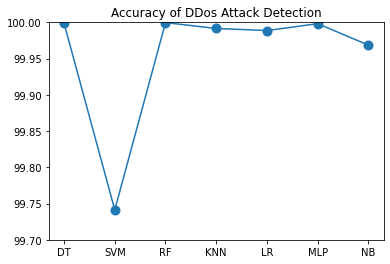

In [ ]:
plt.plot(classifiers,scores,marker='o', markersize=9)

plt.title("Accuracy of DDos Attack Detection")
plt.ylim(99.7,100)
plt.show()

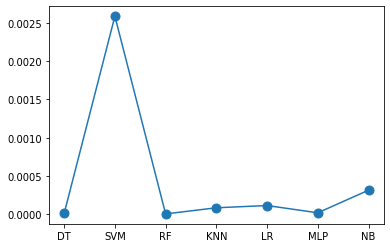

In [ ]:
plt.plot(classifiers,error_rate, marker='o', markersize=9)